### DATA DESCRIPTION: 

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. 

 RowNumber: Row Numbers from 1 to 10000 

 CustomerId: Unique Ids for bank customer identification 

 Surname: Customer's last name 

 CreditScore: Credit score of the customer 

 Geography: The country from which the customer belongs 

 Gender: Male or Female 

 Age: Age of the customer 

 Tenure: Number of years for which the customer has been with the bank 

 Balance: Bank balance of the customer 

 NumOfProducts: Number of bank products the customer is utilising 

 HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not 

 IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not 

 EstimatedSalary: Estimated salary of the customer in Dollars 

 Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained 

 > Target Column Description: Exited is a class label used to divide into groups (customer closed account or not). 
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.shape

(10000, 14)

In [3]:
df['HasCrCard'] = df['HasCrCard'].astype('object')
df['IsActiveMember'] = df['IsActiveMember'].astype('object')
df['Exited'] = df['Exited'].astype('object')




In [4]:
df_cat = df.select_dtypes('O')
df_cat.columns

Index(['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember',
       'Exited'],
      dtype='object')

In [5]:
df_num = df.select_dtypes(np.number)
df_num.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary'],
      dtype='object')

In [6]:
df_num.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [7]:
df_cat.describe()

,Surname,Geography,Gender,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000,10000
unique,2932,3,2,2,2,2
top,Smith,France,Male,1,1,0
freq,32,5014,5457,7055,5151,7963


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [10]:
df['Exited'] = df['Exited'].astype('int')

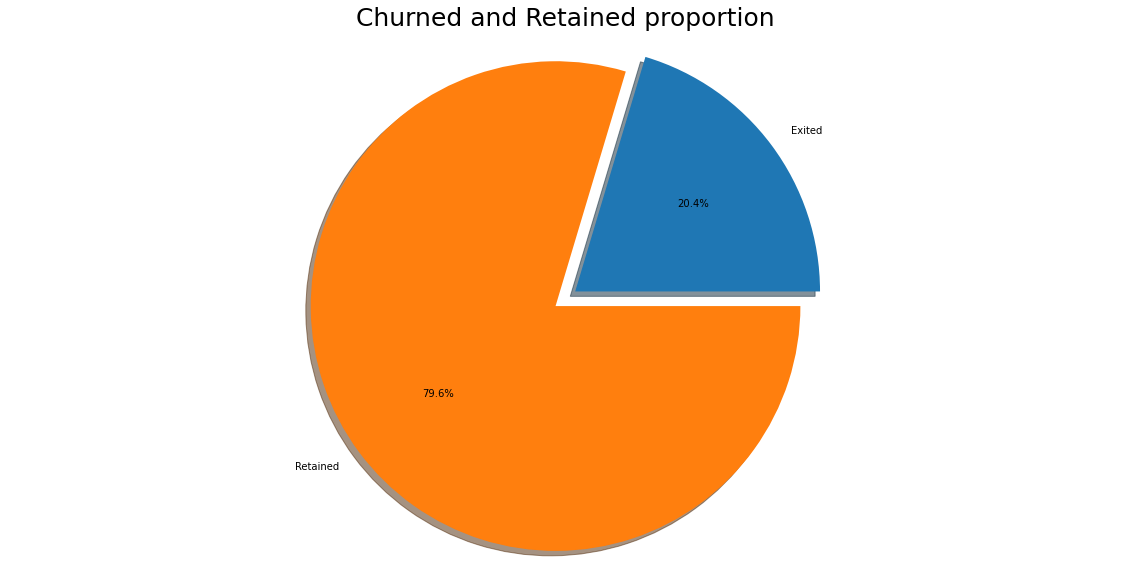

In [11]:
fig, axs = plt.subplots(figsize=(20, 10))
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
axs.pie(sizes, explode=(0, 0.1), labels=['Exited', 'Retained'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Churned and Retained proportion", size = 25)
plt.show()


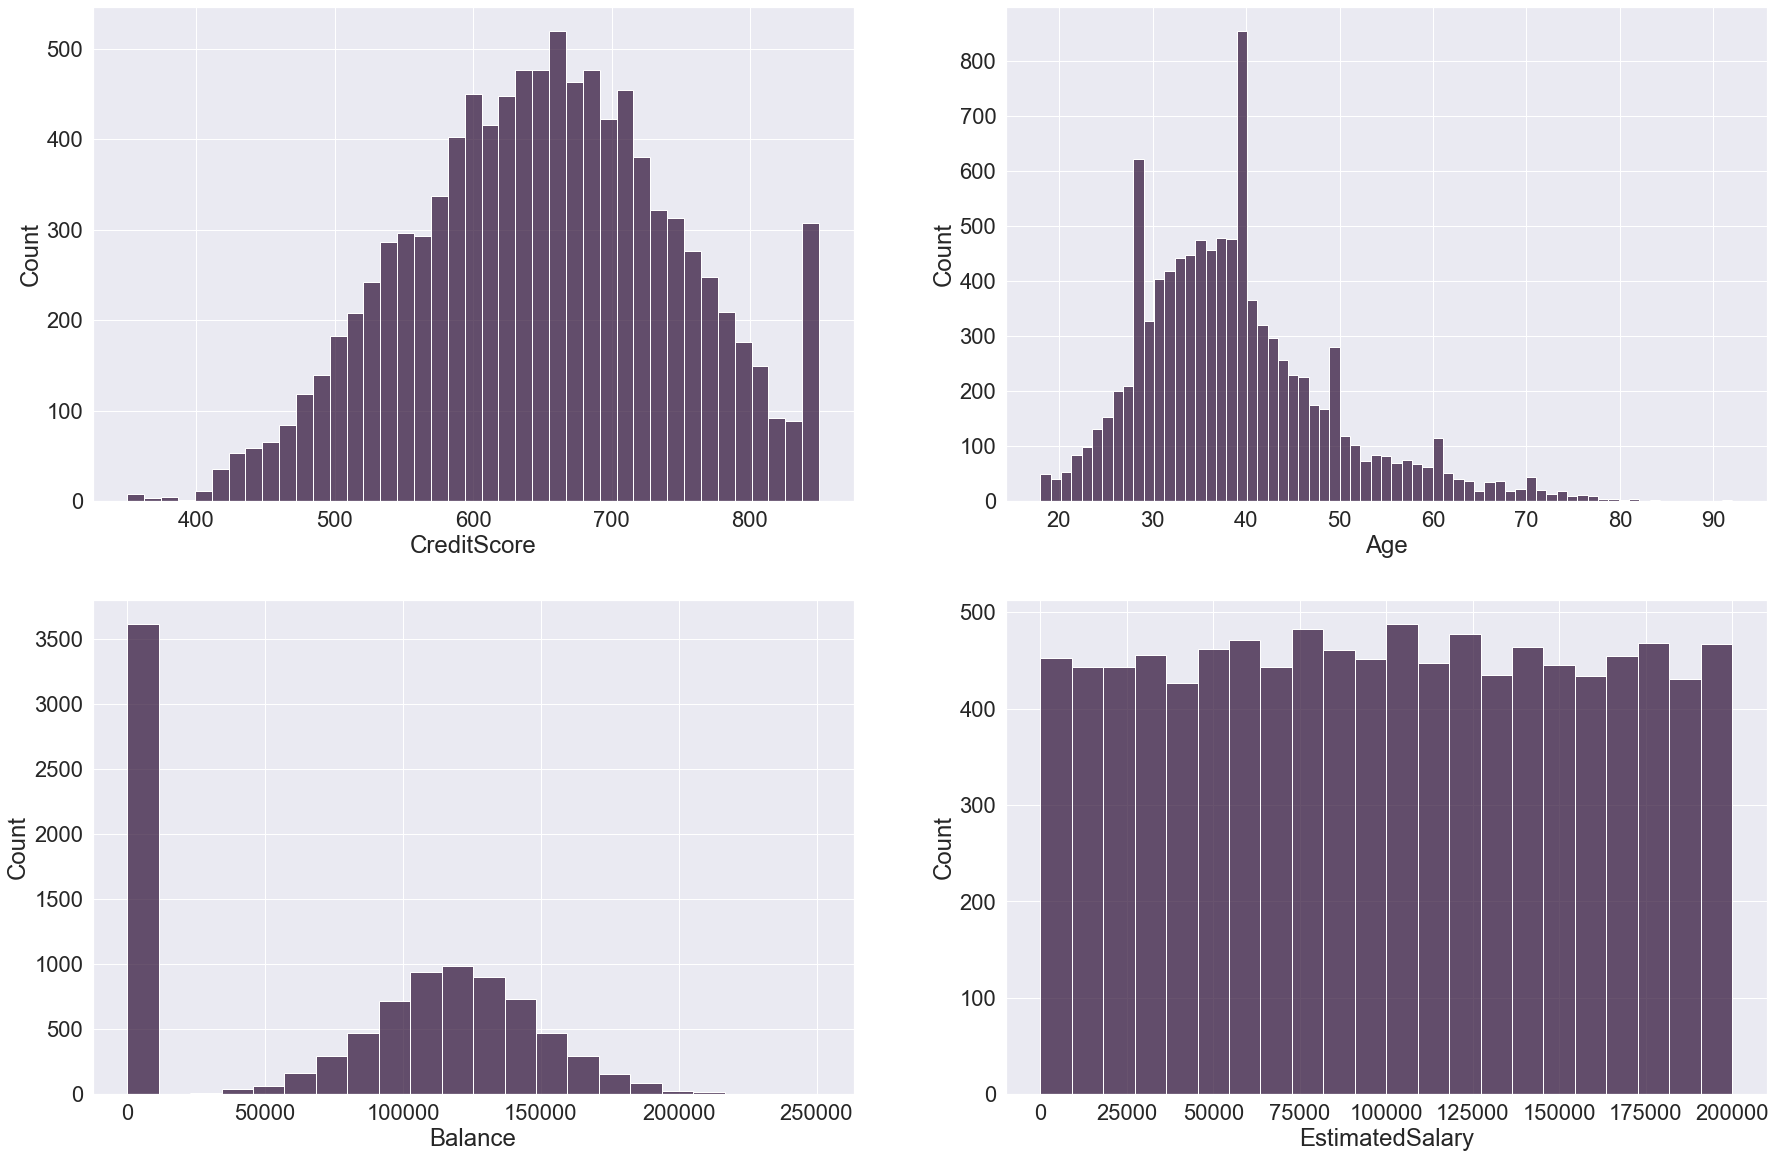

In [12]:
sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale = 2)
fig,axs = plt.subplots(2,2)
sns.set_theme(palette="rocket")
sns.histplot(data = df,x = "CreditScore",ax=axs[0,0])
sns.histplot(data = df,x = "Age",ax=axs[0,1])
sns.histplot(data = df,x = "Balance",ax=axs[1,0])
sns.histplot(data = df,x = "EstimatedSalary",ax=axs[1,1])
plt.show()

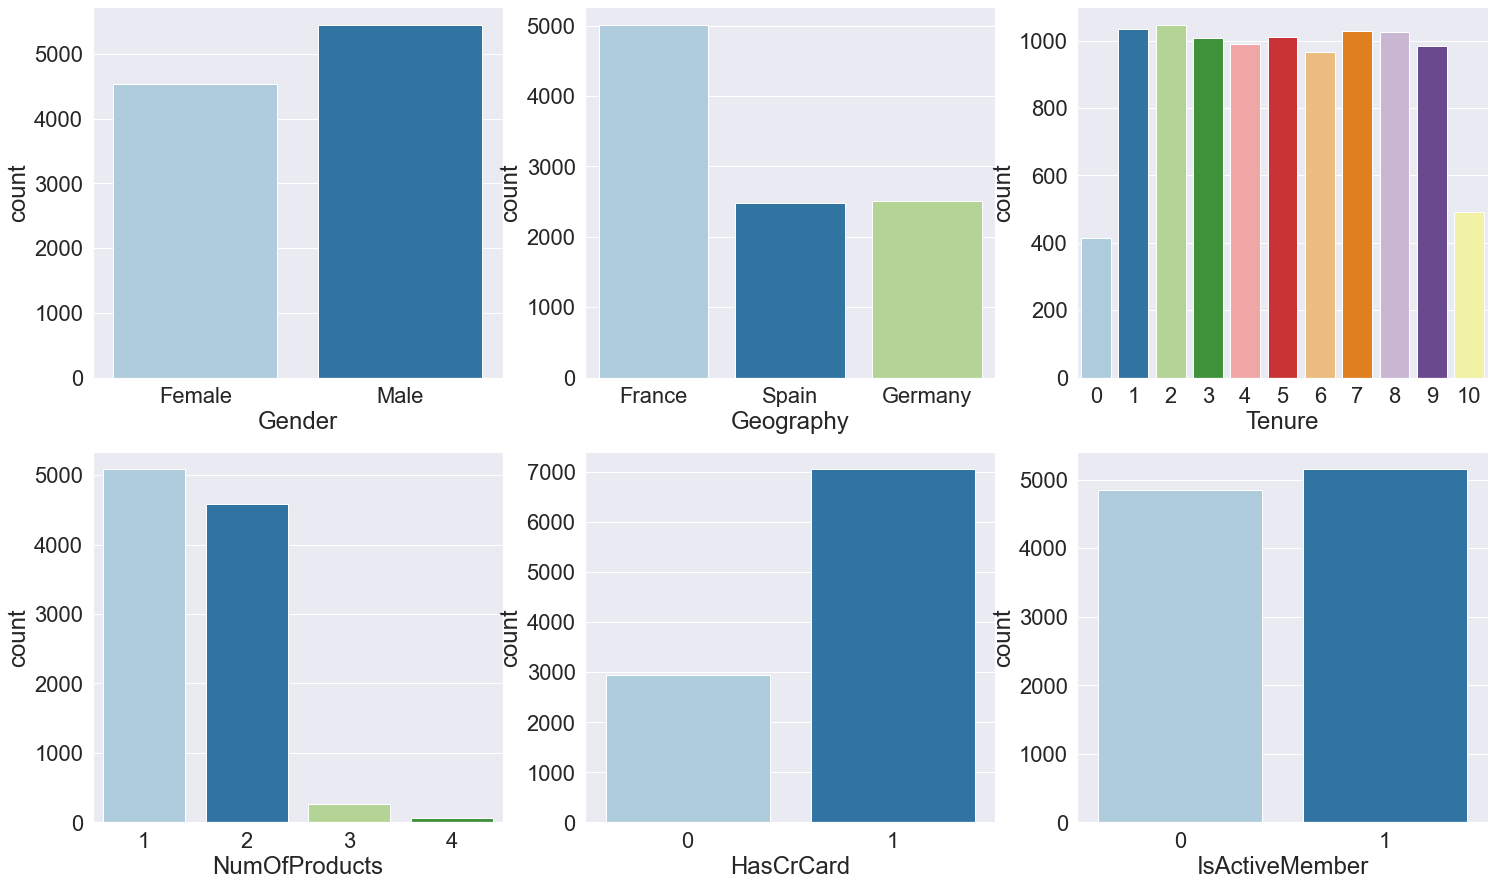

In [13]:

sns.set(rc={'figure.figsize':(25,15)})
sns.set(font_scale = 2)
fig,axs = plt.subplots(2,3)
sns.set_theme(palette="Paired")
sns.countplot(data = df,x = 'Gender',ax=axs[0,0])
sns.countplot(data = df,x = 'Geography',ax=axs[0,1])
sns.countplot(data = df,x = 'Tenure',ax=axs[0,2])
sns.countplot(data = df,x = 'NumOfProducts',ax=axs[1,0])
sns.countplot(data = df,x = 'HasCrCard',ax=axs[1,1])
sns.countplot(data = df,x = 'IsActiveMember',ax=axs[1,2])
plt.show()

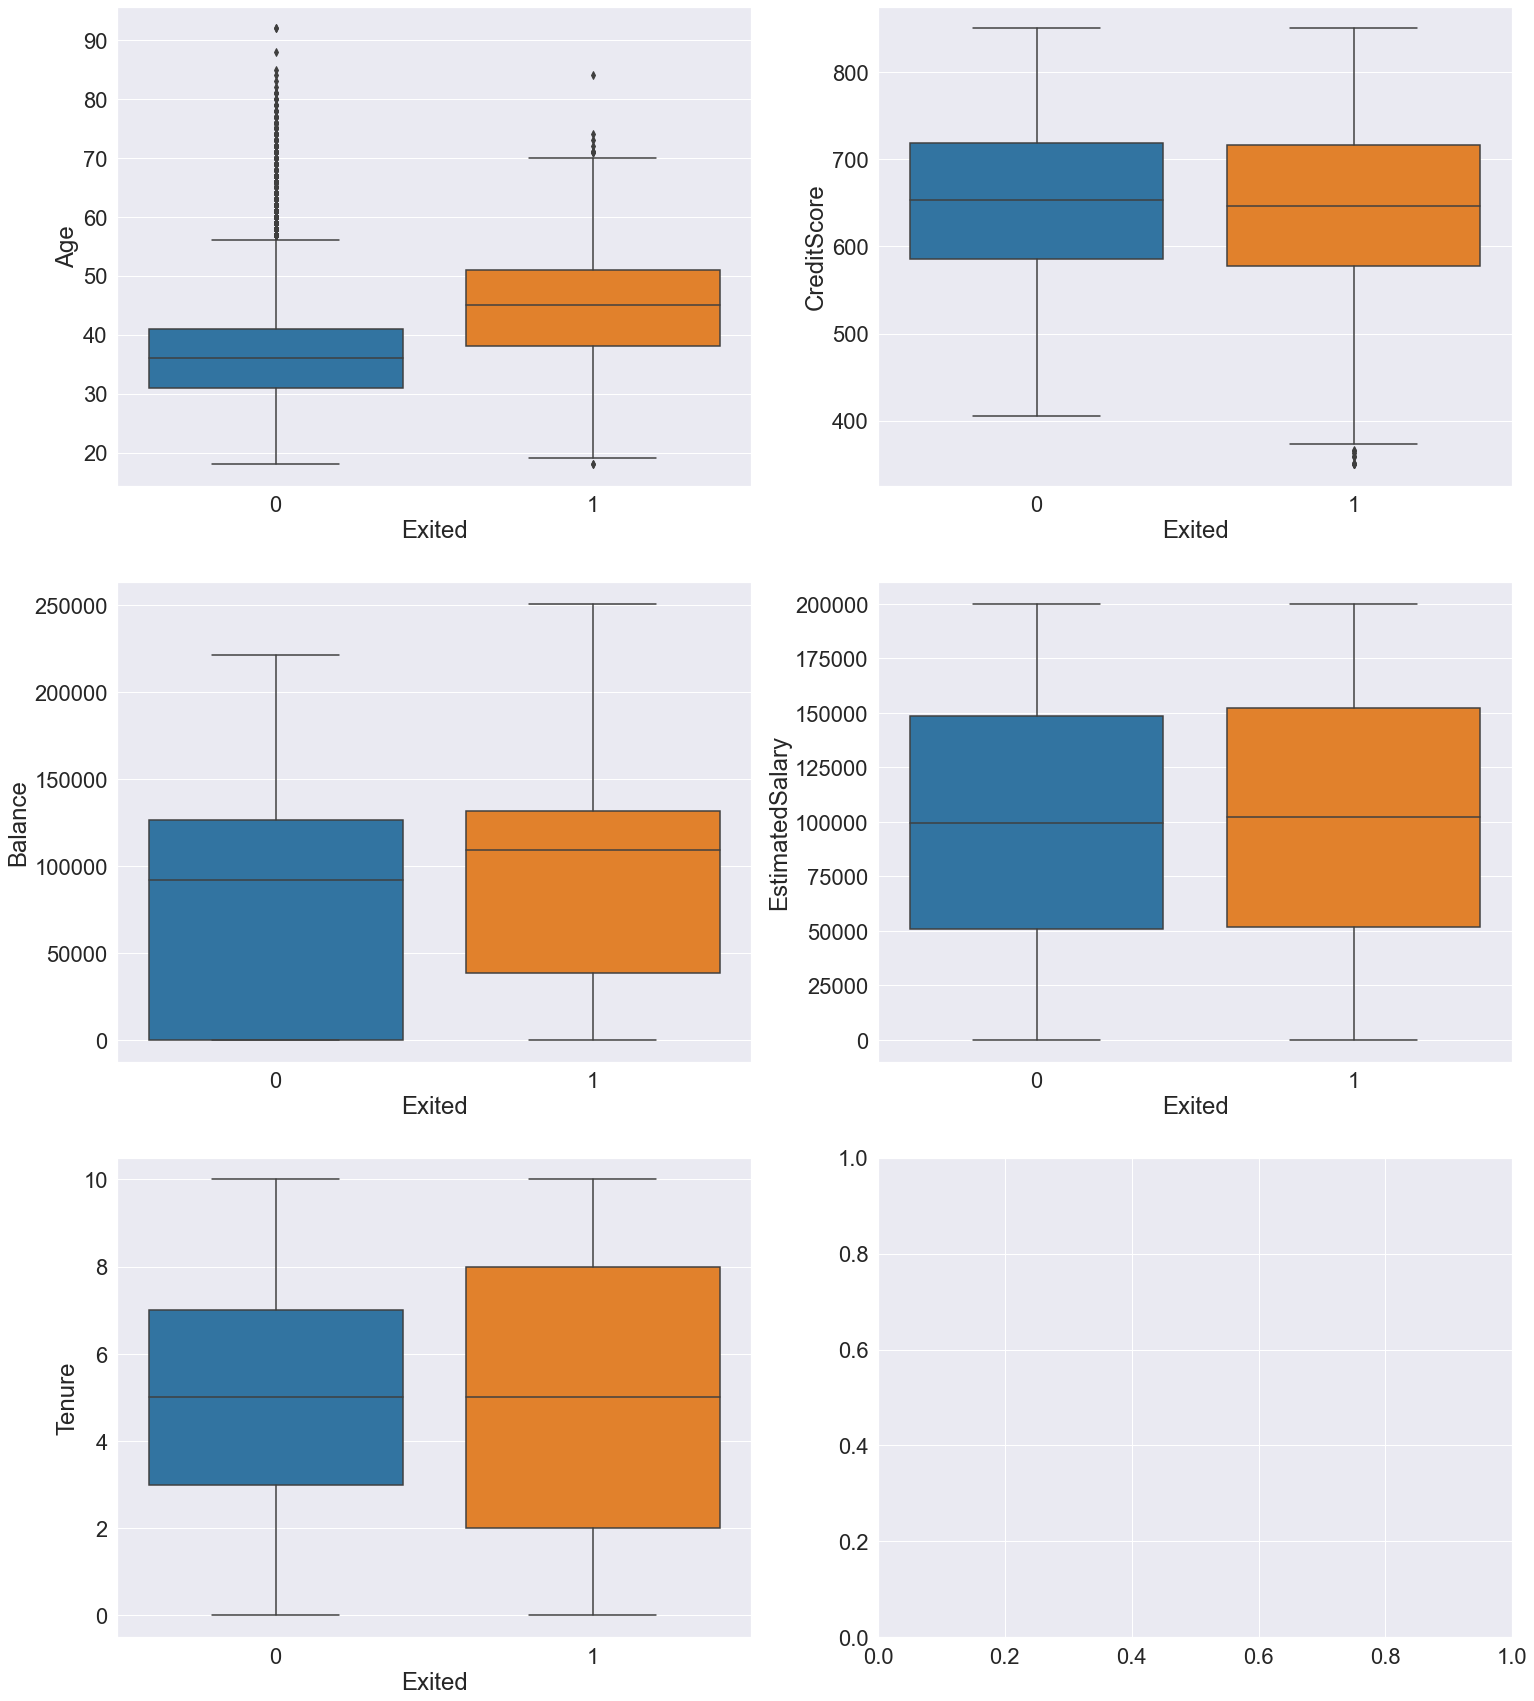

In [14]:
sns.set(rc={'figure.figsize':(25,30)})
sns.set(font_scale = 2)
fig,axs = plt.subplots(3,2)
sns.set_theme(palette="tab10")
sns.boxplot(data = df,x = "Exited",y = "Age",ax = axs[0,0])
sns.boxplot(data = df,x = "Exited",y = "CreditScore",ax = axs[0,1])
sns.boxplot(data = df,x = "Exited",y = "Balance",ax = axs[1,0])
sns.boxplot(data = df,x = "Exited",y = "EstimatedSalary",ax = axs[1,1])
sns.boxplot(data = df,x = "Exited",y = "Tenure",ax=axs[2,0])
plt.show()

In [15]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])


Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

In [16]:
df['Exited'] = df['Exited'].astype('object')

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit_transform(df_num.values)

df_num = pd.DataFrame(data = ss,index = df_num.index,columns = df_num.columns)

df_num.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-2.338130e-17,7.588219e-15,-4.870326e-16,2.484679e-16,-1.400324e-16,-5.978551e-17,-8.652634e-16,-1.580958e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.731878e+00,-1.741069e+00,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,-1.740268e+00
25%,-8.659388e-01,-8.676501e-01,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,-8.535935e-01
50%,0.000000e+00,-2.816100e-03,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,1.802807e-03
75%,8.659388e-01,8.659939e-01,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,8.572431e-01
max,1.731878e+00,1.734255e+00,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,1.737200e+00


In [18]:
#clean df

df = pd.concat([df_cat,df_num],axis = 1)

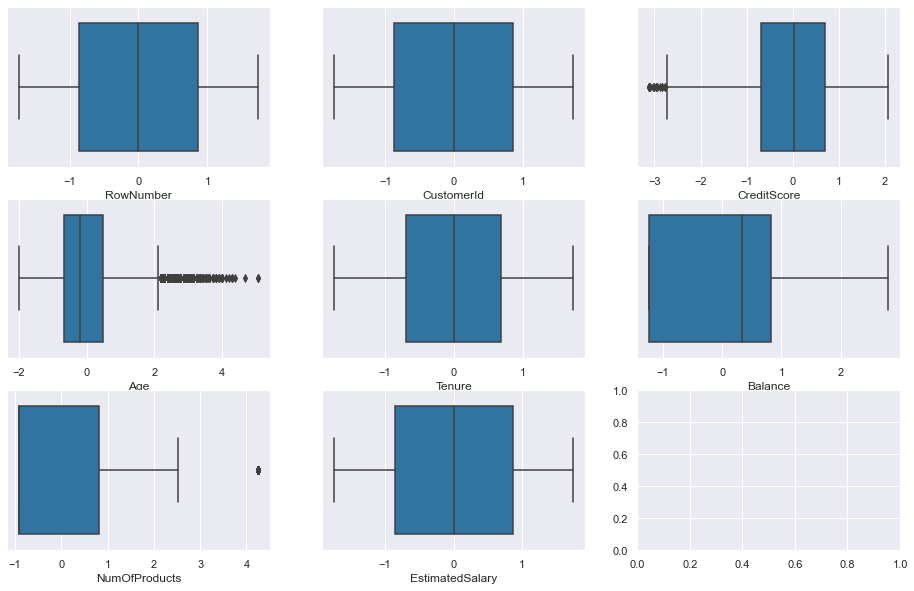

In [19]:
fig,ax = plt.subplots(nrows = 3, ncols = 3, figsize = (16,10))

df_num = df.select_dtypes(np.number)
for i,j in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i],ax = j)
    
plt.show()

In [20]:
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)

iqr = q3 - q1

df = df[~((df < (q1 - 1.5 * iqr))| (df > (q3 + 1.5 * iqr))).any(axis = 1)]
df.shape

(9515, 14)

In [21]:
df['Exited'].value_counts()/len(df)*100

0    80.357331
1    19.642669
Name: Exited, dtype: float64

In [22]:
df = df.drop(['CustomerId','Surname','RowNumber'],axis = 1)

In [23]:
df['Exited'] = df['Exited'].astype('int')

<AxesSubplot:>

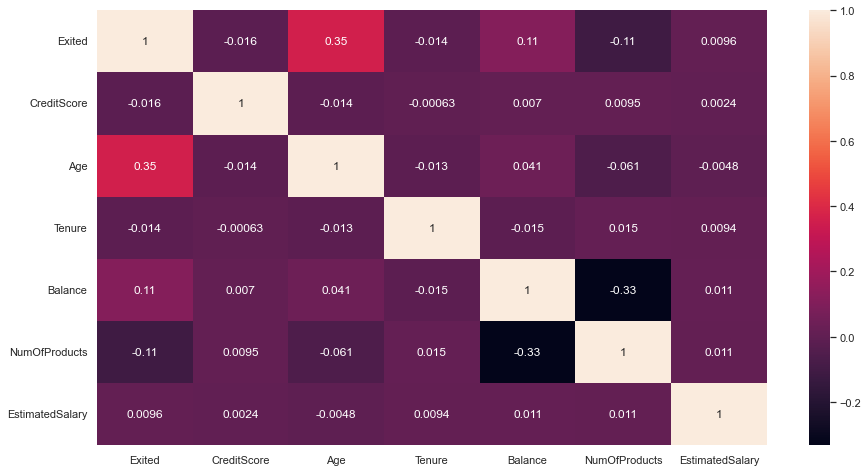

In [24]:

plt.figure(figsize = (15,8))

sns.heatmap(df.corr(),annot = True)

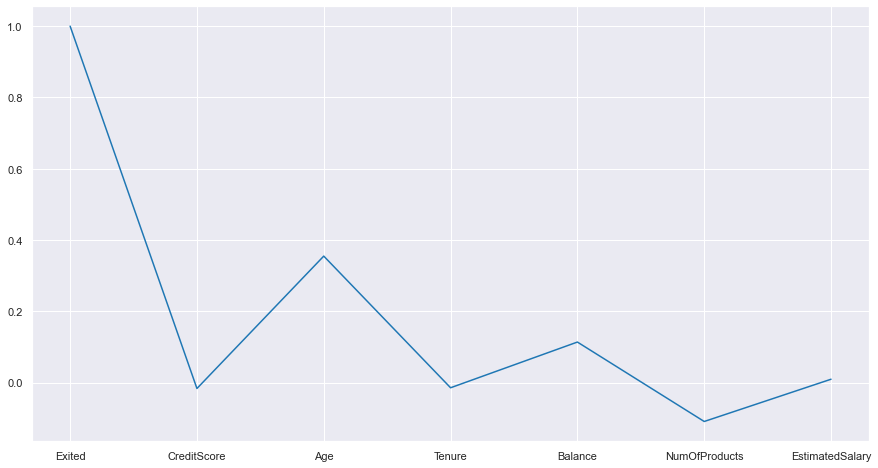

In [25]:
plt.figure(figsize = (15,8))
df.corr()['Exited'].plot()
plt.show()

In [26]:
#Check for multi-collinearity using VIF


x = df.drop('Exited',axis = 1)

x = pd.get_dummies(x,drop_first = True)

y = df['Exited']

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

vif['features'] = x.columns

multi = vif.sort_values('vif_factor',ascending = False).head()
multi

,vif_factor,features
9,2.185012,HasCrCard_1
8,1.832480,Gender_Male
10,1.714972,IsActiveMember_1
6,1.580130,Geography_Germany
3,1.348576,Balance


In [27]:
multi = multi.features.to_list()
multi

['HasCrCard_1',
 'Gender_Male',
 'IsActiveMember_1',
 'Geography_Germany',
 'Balance']

In [28]:
from sklearn.model_selection import train_test_split

x = df.drop('Exited',axis = 1)

x = pd.get_dummies(x,drop_first = True)
y = df['Exited']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)



In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [30]:
dtc = DecisionTreeClassifier(random_state = 1)

model = dtc.fit(x_train,y_train)


In [31]:
print('The train accuracy is ',model.score(x_train,y_train))
print('The test accuracy is ',model.score(x_test,y_test))

The train accuracy is  1.0
The test accuracy is  0.8010507880910683


In [32]:
from sklearn.feature_selection import RFE
dtc = DecisionTreeClassifier(random_state = 1,class_weight = 'balanced')
rfe_model = RFE(estimator = dtc,n_features_to_select = 8)
rfe_model = rfe_model.fit(x_train,y_train)

In [33]:
df_rfe = pd.DataFrame()
df_rfe['features'] = x.columns
df_rfe['ranking'] = rfe_model.ranking_

top = df_rfe[df_rfe['ranking']==1]
top = top.features.to_list()
top

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Geography_Germany',
 'IsActiveMember_1']

In [34]:
x_top = x[top]


x_train,x_test,y_train,y_test = train_test_split(x_top,y,test_size = 0.3,random_state = 1)

model_top = dtc.fit(x_train,y_train)


In [35]:
print('The train accuracy is ',model_top.score(x_train,y_train))
print('The test accuracy is ',model_top.score(x_test,y_test))

The train accuracy is  1.0
The test accuracy is  0.7950963222416813


In [36]:
from sklearn.model_selection import GridSearchCV

tuned_params = [{'criterion':['gini','entropy'],'max_depth': range(2,10),'min_samples_split' : range(2,10)}]

grid = GridSearchCV(estimator = dtc,param_grid = tuned_params,cv = 5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10),
                          'min_samples_split': range(2, 10)}])

In [37]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [38]:

dtc_tuned = DecisionTreeClassifier(random_state = 1,criterion = 'gini',max_depth = 3,min_samples_split = 2,class_weight = 'balanced')

model_final = dtc_tuned.fit(x_train,y_train)

In [39]:
print('The train accuracy is ',model_final.score(x_train,y_train))
print('The test accuracy is ',model_final.score(x_test,y_test))

The train accuracy is  0.8361861861861862
The test accuracy is  0.8329246935201401


In [40]:
y_pred = model_final.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2293
           1       0.59      0.52      0.55       562

    accuracy                           0.83      2855
   macro avg       0.74      0.71      0.72      2855
weighted avg       0.83      0.83      0.83      2855



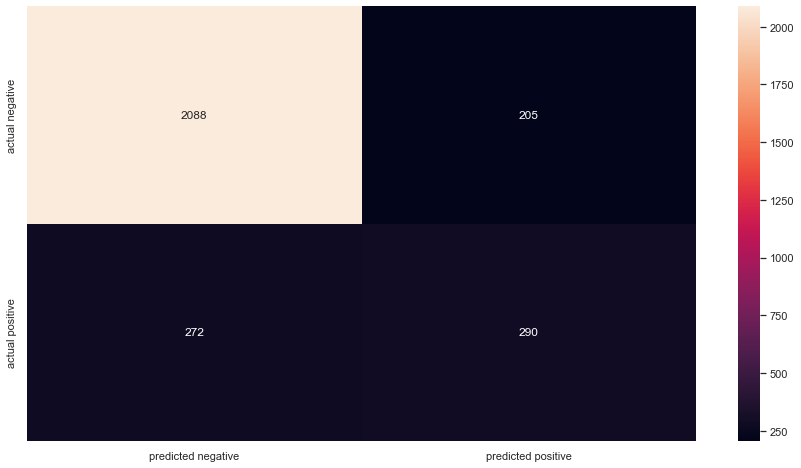

In [41]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (15,8))
cm = confusion_matrix(y_test,y_pred)

conf = pd.DataFrame(data=cm,columns=['predicted negative','predicted positive'],index=['actual negative','actual positive'])
sns.heatmap(conf,annot=True,fmt='g')
plt.show()

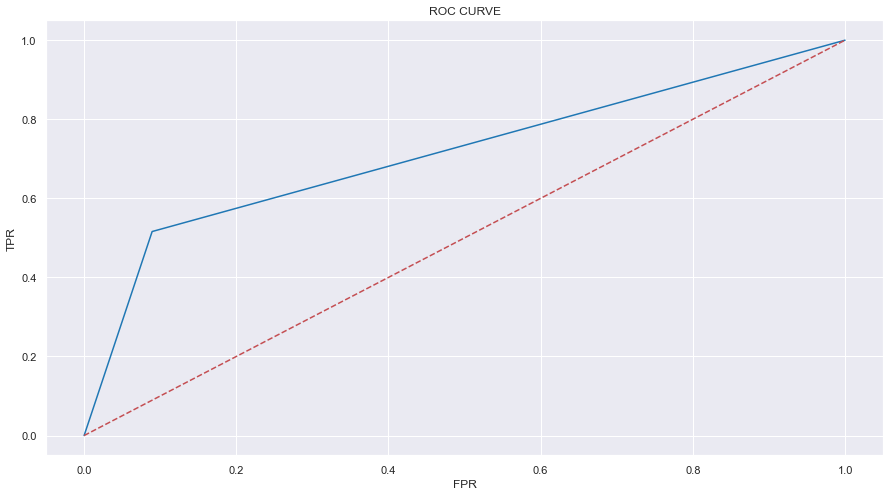

In [42]:
from sklearn.metrics import roc_auc_score,roc_curve

y_pred = model_final.predict(x_test)

fpr,tpr,th = roc_curve(y_test,y_pred)
plt.figure(figsize = (15,8))
plt.plot(fpr,tpr,label = 'Decision Tree classifier')

plt.plot([0,1],[0,1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [43]:
print(roc_auc_score(y_test,y_pred))

0.7133058527190134


In [44]:
from sklearn.metrics import cohen_kappa_score

print(cohen_kappa_score(y_test,y_pred))


0.4467132941002009


In [45]:
#Random Forest Classifier

from sklearn.model_selection import train_test_split

x = df.drop('Exited',axis = 1)

x = pd.get_dummies(x,drop_first = True)
y = df['Exited']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)



In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1,class_weight = 'balanced')

model_rf = rf.fit(x_train,y_train)



In [47]:
print('The train accuracy is ',model_rf.score(x_train,y_train))
print('The test accuracy is ',model_rf.score(x_test,y_test))


The train accuracy is  1.0
The test accuracy is  0.8591943957968476


In [48]:
from sklearn.feature_selection import RFE
rfc = RandomForestClassifier(random_state = 1,class_weight = 'balanced')
rfe_model = RFE(estimator = rfc,n_features_to_select = 8)
rfe_model = rfe_model.fit(x_train,y_train)

In [49]:

df_rfe = pd.DataFrame()
df_rfe['features'] = x.columns
df_rfe['ranking'] = rfe_model.ranking_

top = df_rfe[df_rfe['ranking']==1]
top = top.features.to_list()
top

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Geography_Germany',
 'IsActiveMember_1']

In [50]:
x_top = x[top]


x_train,x_test,y_train,y_test = train_test_split(x_top,y,test_size = 0.3,random_state = 1)

model_rf_top = dtc.fit(x_train,y_train)


In [51]:
print('The train accuracy is ',model_rf_top.score(x_train,y_train))
print('The test accuracy is ',model_rf_top.score(x_test,y_test))

The train accuracy is  1.0
The test accuracy is  0.7950963222416813


In [52]:

params =  {'max_depth': range(2,10)}

grid = GridSearchCV(estimator = rf, param_grid = params,cv = 5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             param_grid={'max_depth': range(2, 10)})

In [53]:
grid.best_params_

{'max_depth': 9}

In [54]:
rf_tuned = RandomForestClassifier(random_state = 1,max_depth =9)

model_rf = rf_tuned.fit(x_train,y_train)


In [55]:
print('The train accuracy is ',model_rf.score(x_train,y_train))
print('The test accuracy is ',model_rf.score(x_test,y_test))

The train accuracy is  0.8924924924924925
The test accuracy is  0.8644483362521891


In [56]:
y_pred_rf = model_rf.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2293
           1       0.78      0.43      0.56       562

    accuracy                           0.86      2855
   macro avg       0.83      0.70      0.74      2855
weighted avg       0.86      0.86      0.85      2855



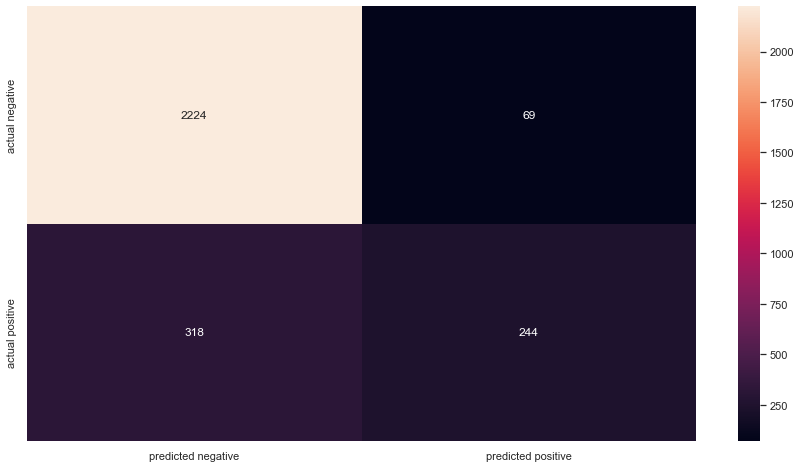

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize = (15,8))

conf = pd.DataFrame(data=cm,columns=['predicted negative','predicted positive'],index=['actual negative','actual positive'])
sns.heatmap(conf,annot=True,fmt='g')
plt.show()

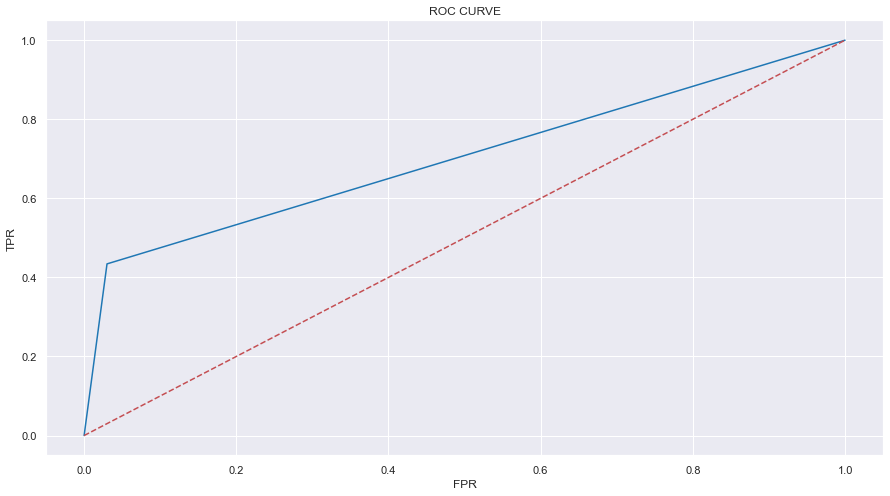

In [58]:
fpr,tpr,th = roc_curve(y_test,y_pred_rf)
plt.figure(figsize = (15,8))
plt.plot(fpr,tpr,label = 'Random Forest Classifier')

plt.plot([0,1],[0,1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [59]:
print(roc_auc_score(y_test,y_pred_rf))

0.7020360589943399


In [60]:
print(cohen_kappa_score(y_test,y_pred_rf))

0.48521720736910234


In [61]:
from sklearn.model_selection import train_test_split

x = df.drop('Exited',axis = 1)

x = pd.get_dummies(x,drop_first = True)
y = df['Exited']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)


In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1,C = 0.01,penalty='l2',class_weight = 'balanced')

model_lr = lr.fit(x_train,y_train)


In [63]:
print('The train accuracy is ',model_lr.score(x_train,y_train))
print('The test accuracy is ',model_lr.score(x_test,y_test))

The train accuracy is  0.7273273273273273
The test accuracy is  0.7260945709281962


In [64]:
y_pred_lr = model_lr.predict(x_test)

In [65]:

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2293
           1       0.39      0.70      0.50       562

    accuracy                           0.73      2855
   macro avg       0.65      0.72      0.66      2855
weighted avg       0.81      0.73      0.75      2855



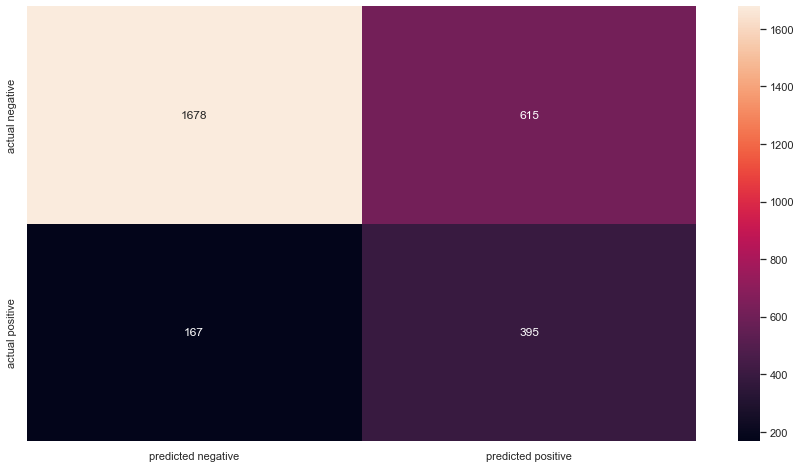

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize = (15,8))

conf = pd.DataFrame(data=cm,columns=['predicted negative','predicted positive'],index=['actual negative','actual positive'])
sns.heatmap(conf,annot=True,fmt='g')
plt.show()

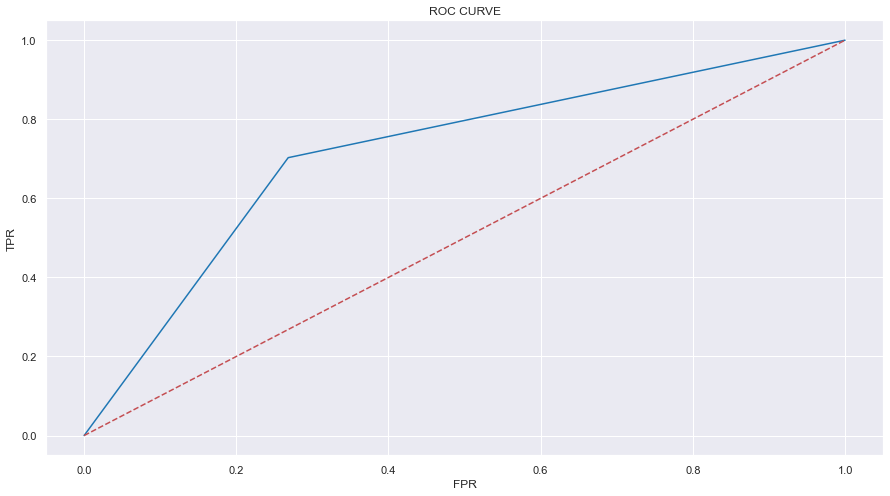

In [67]:
fpr,tpr,th = roc_curve(y_test,y_pred_lr)
plt.figure(figsize = (15,8))
plt.plot(fpr,tpr,label = 'Logistic Regression')

plt.plot([0,1],[0,1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [68]:
print(roc_auc_score(y_test,y_pred_lr))

0.7173196933883567


In [69]:
print(cohen_kappa_score(y_test,y_pred_lr))

0.33410979414343744


In [70]:
comparison = pd.DataFrame(data = [['Decision Tree Classifier',83,290,2088,205,272,0.71,0.44],['Logistic Regression',72,395,1678,615,167,0.71,0.33],
                                  ['Random Forest classifier',86,244,2224,69,318,0.70,0.48]],
                          columns = ['Algorithm Name','Accuracy','True Positive','True Negative','False Positive','False Negative','ROC-AUC Score','Cohen-Kappa Score'])

comparison

,Algorithm Name,Accuracy,True Positive,True Negative,False Positive,False Negative,ROC-AUC Score,Cohen-Kappa Score
0,Decision Tree Classifier,83,290,2088,205,272,0.71,0.44
1,Logistic Regression,72,395,1678,615,167,0.71,0.33
2,Random Forest classifier,86,244,2224,69,318,0.70,0.48
